## Описание задачи и данных

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных  

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении


## Изучение данных

In [1]:
# Сброс ограничений на количество выводимых данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:

data = pd.read_csv('/datasets/real_estate_data.csv',sep ='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

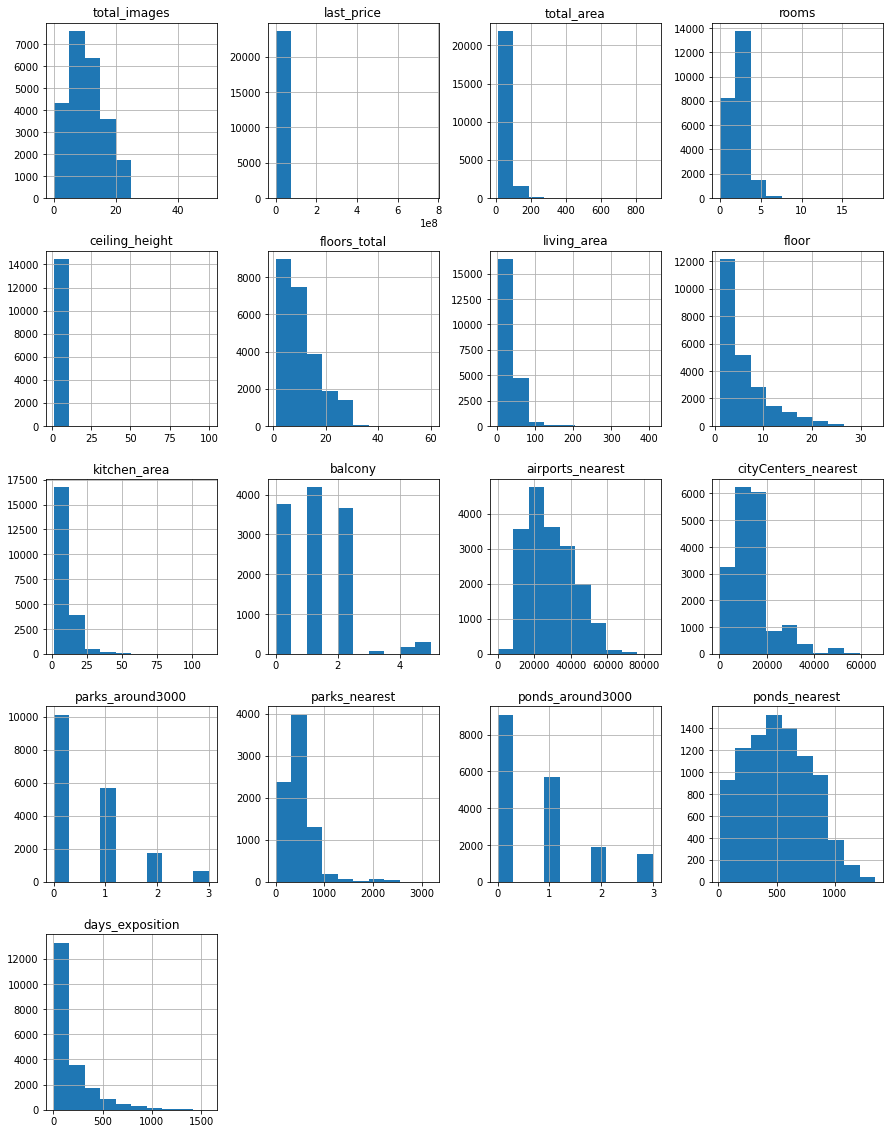

In [5]:
data.hist(figsize=(15, 20))

Качество и объем данных достаточные для ответа на поставленные вопросы. Как видно из графиков, во многих столбцах есть редкие (выбивающиеся значения), которые необходимо будет обработать на этапе предобработки данных. Также в данных есть столбец, который никак не будет задействован в анализе (total_images), хотя этот параметр может влиять на срок продажи квартиры (days_exposition).

## Предобработка данных

###   Устранение пропусков и аномальных значений

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Устранение пропусков в столбце balcony

In [7]:
display(data['balcony'].unique())
data['balcony'].fillna(value=0,inplace=True)
data.isna().sum() 

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце balcony (число балконов) заполнили нулями

#### Устранение пропусков в столбце is_apartment

In [8]:
display(data['is_apartment'].unique())
data['is_apartment'].fillna(value=False,inplace=True)
data.isna().sum()

array([nan, False, True], dtype=object)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в стоблце is_apartment заменили на False, так как если человек не указывает, является ли помещение апартаментом, то скорее всего это помещение не является апартаментом. 

#### Устранение аномальных значений и пропусков в столбце ceiling_height

In [9]:

display(data['ceiling_height'].describe())
display(data.query('ceiling_height>20'))
data['ceiling_height'] = np.where(data['ceiling_height']>20 , data['ceiling_height']*0.1, data['ceiling_height'])
display(data['ceiling_height'].describe())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.isna().sum()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,False,False,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,False,False,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,False,False,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,False,False,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,False,False,False,5.7,0.0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,False,False,False,5.2,0.0,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


count    14504.000000
mean         2.730849
std          0.350473
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Высота потолка больше 20 метров является аномальной, скорее всего запятая стоит не там, где должна, поэтому значения больше 20 уменьшили в 10 раз. А пропуски заменили на медианное значение. 

#### Устранение пропусков в столбце floors_total

In [10]:
display(data['floors_total'].unique())
display(data['floors_total'].describe())
display(data['floors_total'].isna().mean())
data = data.dropna(subset=['floors_total'])
data.isna().sum()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

0.0036288450989493226

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Строки, где отсутвует значение в столбце floors_total было решено удалить, так как они составляют меньше 1% от объема выборки.

#### Изучение пропусков в столбце kitchen_area

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

total_images            972
last_price              972
total_area              972
first_day_exposition    972
rooms                   972
ceiling_height          972
floors_total            972
living_area             925
floor                   972
is_apartment            972
studio                  972
open_plan               972
kitchen_area            972
balcony                 972
locality_name           967
airports_nearest        892
cityCenters_nearest     895
parks_around3000        895
parks_nearest           546
ponds_around3000        895
ponds_nearest           587
days_exposition         738
dtype: int64

total_images            1020
last_price              1020
total_area              1020
first_day_exposition    1020
rooms                   1020
ceiling_height          1020
floors_total            1020
living_area              972
floor                   1020
is_apartment            1020
studio                  1020
open_plan               1020
kitchen_area            1020
balcony                 1020
locality_name           1015
airports_nearest         929
cityCenters_nearest      932
parks_around3000         932
parks_nearest            565
ponds_around3000         932
ponds_nearest            609
days_exposition          781
dtype: int64

<AxesSubplot:>

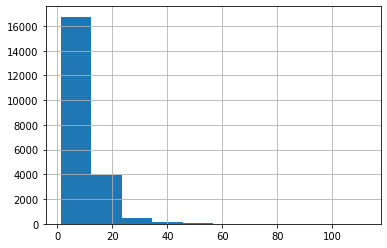

In [11]:
display(data['kitchen_area'].describe())
display(data.query('kitchen_area>20 & total_area>50').count())
display(data.query('kitchen_area>20').count())
display(data['kitchen_area'].hist())

Наличие большой кухни (больше 15 кв м ) нормально для больших квартир, поэтому не будем убирать эти записи из выборки. 

#### Устранение пропусков в столбцах living_area и kitchen_area

In [12]:
# заполняем пропуски в столбце living_area

data['living_area_perc']=data['living_area']/data['total_area']

for value in data['rooms'].unique():
    data.loc[(data['rooms'] == value),'living_area_perc'] = \
    data.loc[(data['rooms'] == value), 'living_area_perc'].median()

data['living_area'] = data['living_area'].fillna(data['living_area_perc']*data['total_area'])

display(data.query('living_area>total_area'))

# заполняем пропуски в столбце kitchen_area

data['kitchen_area_perc']=data['kitchen_area']/data['total_area']

for value in data['rooms'].unique():
    data.loc[(data['rooms'] == value),'kitchen_area_perc'] = \
    data.loc[(data['rooms'] == value), 'kitchen_area_perc'].median()

data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area_perc']*data['total_area'])


display(data.query('kitchen_area>total_area'))



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_perc


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_perc,kitchen_area_perc


Проверили данные на нестыковки:есть ли в выборке квартиры, где кухня или жилая площадь больше общей площади.Таких объявлений нет.
Пропуски в столбце living_area решили заполнить следующим образом.
Берем среднее для данного типа квартир отношение жилой площади к общей площади, таким образам получаем коэффициент, этот коэффициент умножаем на общую площадь квартиры. Аналогично решила заполнить пропуски в столбце с прощадью кухни. 


#### Анализ пропусков в столбце days_exposition

<AxesSubplot:>

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

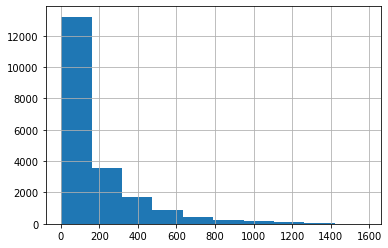

In [13]:
display(data['days_exposition'].hist())
display(data['days_exposition'].describe())
data_without_days_exposition=data.loc[(data['days_exposition'].isna())]
data_without_days_exposition['days_exposition'].hist()


Заполнять пропуски в  days_exposition не будем, так как скорее всего они соответствуют активным объявлениям (еще не снятым с публикации). 

### Изменение типов данных

#### Изменение типа данных столбца is_apartment

In [14]:
try:
    data['is_apartment'] = data['is_apartment'].astype('bool')
except:
    display('Не удалось  изменить тип данных столбца is_apartment')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23419 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Изменение типа данных столбцов floors_total,days_exposition,balcony

In [15]:
try:
    data[['floors_total', 'days_exposition','balcony']]=data[['floors_total', 'days_exposition','balcony']].astype('int64')
except:
    display('Не удалось  изменить тип данных столбца')
data.info()

'Не удалось  изменить тип данных столбца'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23419 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### Изменение типа данных столбца first_day_exposition

In [16]:
try:
    data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
except:
    display('Не удалось  изменить тип данных столбца first_day_exposition')
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23419 non-null  float64       
 13  balcony         

Столбец is_apartment в описании был задан как столбец булев тип. Количество этажей, количество балконов и количество дней публикации объявления являются целым числом.Изменили тип данных столбца first_day_exposition на datetime.

### Устранение выбросов

count    23613.000000
mean         2.699612
std          0.277470
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

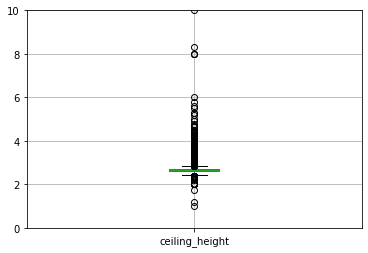

In [17]:
data.boxplot(column=['ceiling_height'])
display(data['ceiling_height'].describe())
plt.ylim(0,10)
plt.show()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

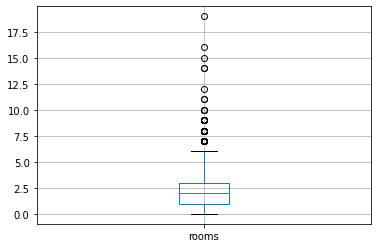

In [18]:
data.boxplot(column=['rooms'])
display(data['rooms'].describe())
plt.show()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

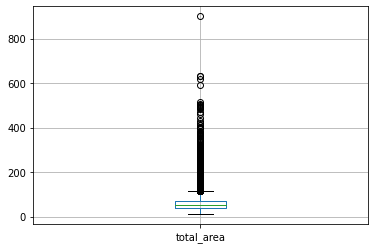

In [19]:
data.boxplot(column=['total_area'])
display(data['total_area'].describe())
plt.show()

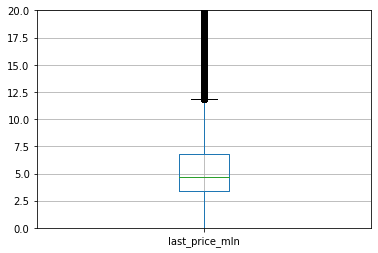

count    23613.000000
mean         6.540555
std         10.901723
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price_mln, dtype: float64

In [20]:
data['last_price_mln']=data['last_price']*0.000001
data.boxplot(column=['last_price_mln'])
plt.ylim(0,20)
plt.show()
display(data['last_price_mln'].describe())

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

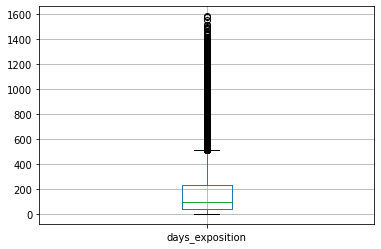

In [21]:
data.boxplot(column=['days_exposition'])
display(data['days_exposition'].describe())
plt.show()

In [22]:
data=data.query('rooms<7 & total_area<120  & ceiling_height<6 & last_price_mln<12')

В результате анализа выбросов было решено оставить в выборке квартиры со следующими параметрами:  
количество комнат меньше 7  
общая площадь меньше 120   
высота потолка меньше 6  
цена меньше 12 млн  

### Создание новых столбцов

#### Создание столбца с кратким наименованием населенного пункта

In [23]:

data['locality_name'] = data['locality_name'].str.lower()


data['short_locality_name']=data['locality_name']

s = ['посёлок городского типа ',
               'посёлок ', 'городской посёлок ',
               'деревня ','поселок ',
               'городского типа ',
               'станции ',
               'пансионат ',
               'садовое товарищество ',
               'городской ',
               'садоводческое некоммерческое товарищество ',
               'село ',
               'посёлок при железнодорожной станции ',
               'при железнодорожной ',
               'платформа ']
data['short_locality_name']=data['short_locality_name'].replace(s, '',regex=True)

display(data['short_locality_name'].value_counts()) 

санкт-петербург               13630
мурино                          586
кудрово                         468
шушары                          438
всеволожск                      394
пушкин                          338
колпино                         335
парголово                       326
гатчина                         303
выборг                          232
петергоф                        195
красное село                    173
сестрорецк                      165
сертолово                       141
новое девяткино                 141
ломоносов                       129
кириши                          125
бугры                           113
сланцы                          112
волхов                          111
кингисепп                       104
тосно                           103
кронштадт                        94
никольское                       94
коммунар                         89
сосновый бор                     86
кировск                          84
отрадное                    

#### Создание столбца с ценой одного квадратного метра

In [24]:
data['price_per_meter']=data['last_price']/data['total_area']
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_perc,kitchen_area_perc,last_price_mln,short_locality_name,price_per_meter
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.482638,0.247788,3.350,шушары,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.585366,0.161050,5.196,санкт-петербург,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.585366,0.161050,10.000,санкт-петербург,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.482638,0.247788,2.890,янино-1,95065.789474
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.482638,0.247788,3.700,парголово,99195.710456


#### Создание столбца с днем недели, месяцем и годом даты подачи объявления

In [25]:
data['weekday_exposition']=pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition']=pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition']=pd.DatetimeIndex(data['first_day_exposition']).year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_perc,kitchen_area_perc,last_price_mln,short_locality_name,price_per_meter,weekday_exposition,month_exposition,year_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.482638,0.247788,3.350,шушары,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.585366,0.161050,5.196,санкт-петербург,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.585366,0.161050,10.000,санкт-петербург,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.482638,0.247788,2.890,янино-1,95065.789474,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.482638,0.247788,3.700,парголово,99195.710456,3,11,2017


#### Создание столбца с типом этажа

In [26]:
def floor_type(row):
    if row['floor']==1:
        return 'первый'
    if row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type']=data.apply(floor_type,axis=1)
display(data.head())
    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_perc,kitchen_area_perc,last_price_mln,short_locality_name,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.482638,0.247788,3.350,шушары,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.585366,0.161050,5.196,санкт-петербург,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.585366,0.161050,10.000,санкт-петербург,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.482638,0.247788,2.890,янино-1,95065.789474,0,9,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.482638,0.247788,3.700,парголово,99195.710456,3,11,2017,другой


#### Создание столбца с расстоянием до центра города в км

In [27]:
data['cityCenters_nearest_km']=(data['cityCenters_nearest']*0.001).round()
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_area_perc,kitchen_area_perc,last_price_mln,short_locality_name,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.482638,0.247788,3.350,шушары,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.585366,0.161050,5.196,санкт-петербург,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.585366,0.161050,10.000,санкт-петербург,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.482638,0.247788,2.890,янино-1,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.482638,0.247788,3.700,парголово,99195.710456,3,11,2017,другой,19.0


## Исследовательский анализ данных

### Построение гистограмм

<AxesSubplot:>

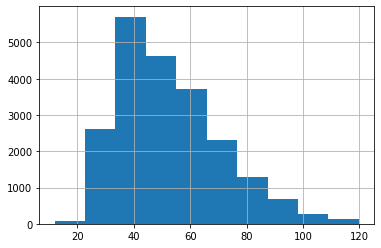

In [28]:
display(data['total_area'].hist())
#figsize=(15, 20)

<AxesSubplot:>

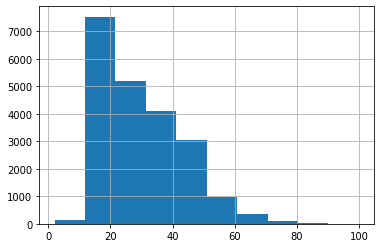

In [29]:
display(data['living_area'].hist())

<AxesSubplot:>

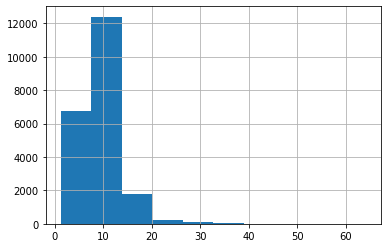

In [30]:
display(data['kitchen_area'].hist())

Площадь кухни больше 15 кв метров является редкостью и свойственно большим квартирам

<AxesSubplot:>

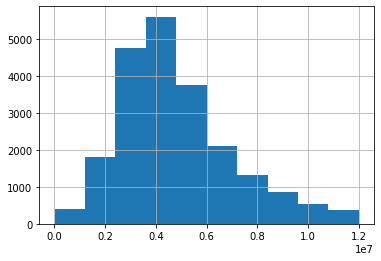

In [31]:
display(data['last_price'].hist())

<AxesSubplot:>

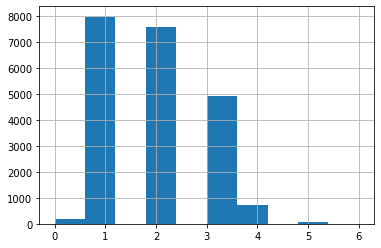

In [32]:
display(data['rooms'].hist())

Больше всего объявлений о продаже однокомнатных квартир

<AxesSubplot:>

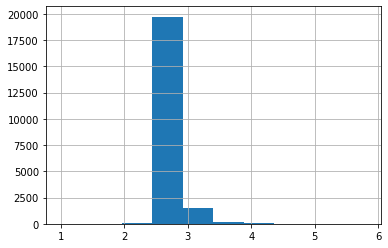

In [33]:
display(data['ceiling_height'].hist())

У большинства квартир высота потолка не превышает 3 метров 

<AxesSubplot:>

count    21480.000000
mean        10.784823
std          6.643676
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

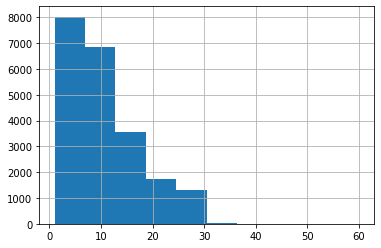

In [34]:
display(data['floors_total'].hist())
display(data['floors_total'].describe())

Большинство домов имеют высоту не более 16 этажей

<AxesSubplot:>

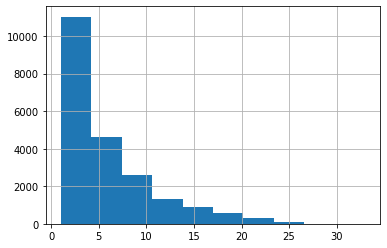

In [35]:
display(data['floor'].hist())

Больше всего квартир с 1 по 5 этаж

<AxesSubplot:>

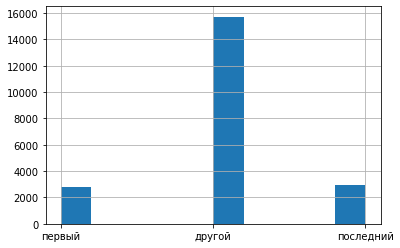

In [36]:
display(data['floor_type'].hist())

В выборке меньше всего квартир на первом и последнем этажах, что логично, ведь в домах больше этажей с типом "Другой" (не первый и не последний). 

<AxesSubplot:>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21480 entries, 1 to 23698
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21480 non-null  int64         
 1   last_price              21480 non-null  float64       
 2   total_area              21480 non-null  float64       
 3   first_day_exposition    21480 non-null  datetime64[ns]
 4   rooms                   21480 non-null  int64         
 5   ceiling_height          21480 non-null  float64       
 6   floors_total            21480 non-null  float64       
 7   living_area             21480 non-null  float64       
 8   floor                   21480 non-null  int64         
 9   is_apartment            21480 non-null  bool          
 10  studio                  21480 non-null  bool          
 11  open_plan               21480 non-null  bool          
 12  kitchen_area            21288 non-null  float6

None

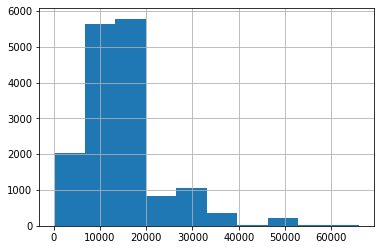

In [37]:
display(data['cityCenters_nearest'].hist())
display(data.info())

В выборке больше всего квартир, расположенных на расстоянии до 20 кв от центра города

<AxesSubplot:>

count    16005.000000
mean     28894.690097
std      12981.354666
min          0.000000
25%      18041.000000
50%      27056.000000
75%      37625.000000
max      84869.000000
Name: airports_nearest, dtype: float64

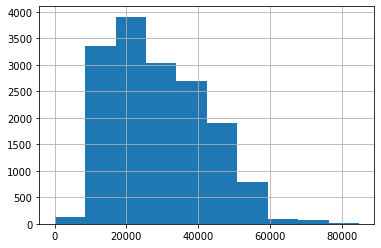

In [38]:
display(data['airports_nearest'].hist())
display(data['airports_nearest'].describe())

В выборке больше всего квартир в пределах 20 км от аэропорта

<AxesSubplot:>

count    6659.000000
mean      489.785253
std       329.983070
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

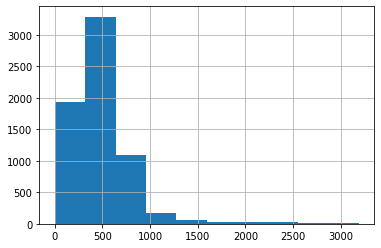

In [39]:
display(data['parks_nearest'].hist())
display(data['parks_nearest'].describe())

Большинство квартир расположены менее чем в 500 м от парка

<AxesSubplot:>

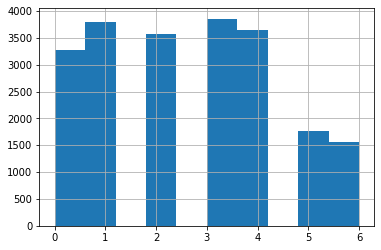

In [40]:
display(data['weekday_exposition'].hist())


В выходные число поданных объявлений меньше чем в другие дни.

<AxesSubplot:>

count    21480.000000
mean         6.398836
std          3.492292
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

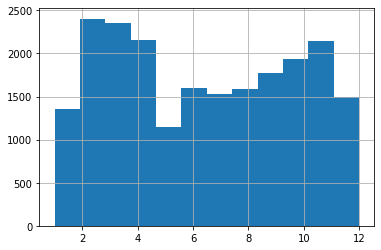

In [41]:
display(data['month_exposition'].hist(bins=12))
display(data['month_exposition'].describe())

В мае число поданных объявлений ниже чем в другие месяцы. 

<AxesSubplot:>

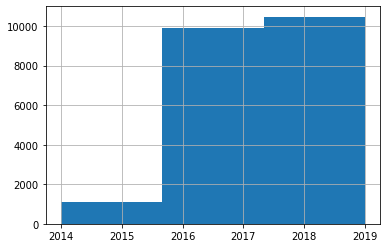

In [42]:
display(data['year_exposition'].hist(bins=3))

С годами число поданных объвлений росло. 

### Исследование срока размещения объявления

<AxesSubplot:>

count    18865.000000
mean       172.454545
std        210.516014
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

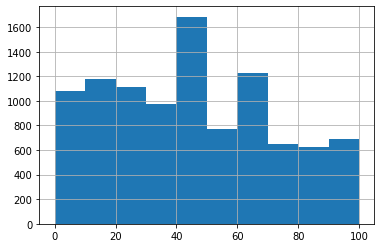

In [43]:
display(data['days_exposition'].hist(range=(0,100)))
display(data['days_exposition'].describe())

Средним значением времени размещения объявления является 172 дня, медианным -  91 дней. Есть очень маленькие значения (всего 1 день) и большие (больше года).Есть 2 пика на 40 и 60 день, возможно некоторые публикации были платными и закончился срок размещения объявления. 

### Исследование зависимости цены от различных параметров

0.6995862150918758

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

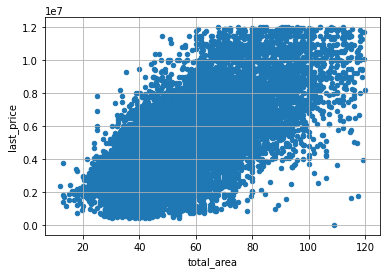

In [44]:
display(data['last_price'].corr(data['total_area']))
data.plot(x='total_area', y='last_price', kind='scatter', sharex=False, grid=True)

Есть корреляция между общей площадью квартиры и ценой, что подтвердается наличием тренда на графике и коэффициентом Пирсона(0.7).С увеличением площади растет и цена.

0.5730675692294979

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

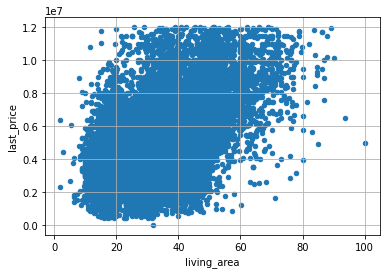

In [45]:
display(data['last_price'].corr(data['living_area']))
data.plot(x='living_area', y='last_price', kind='scatter', sharex=False, grid=True)

Прослеживается прямая корреляция между ценой и жилой площадью, но уже слабее чем взаимосвязь цены с общей площадью.

0.48344792568660916

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

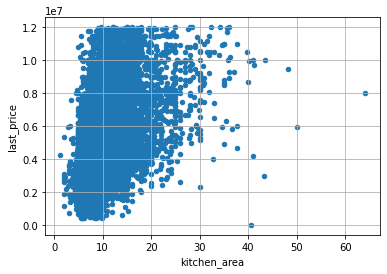

In [46]:
display(data['last_price'].corr(data['kitchen_area']))
data.plot(x='kitchen_area', y='last_price', kind='scatter', sharex=False, grid=True)

Есть слабая корреляция между площадью кухни и ценой квартиры. 

,last_price
rooms,
0,2700000.0
1,3600000.0
2,4650000.0
3,5700000.0
4,6845000.0
5,8100000.0
6,9100000.0


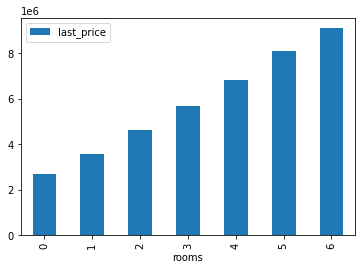

In [47]:
def barplot(param1,param2='last_price'):
    data_new = data.pivot_table(index=[param1], values=param2,  aggfunc=['median'])
    data_new.columns = [param2]
    data_new.plot(y=param2, kind='bar')
    display(data_new)
barplot('rooms')

С увеличением числа комнат цена растет.

,last_price
floor_type,
другой,4580000.0
первый,3800000.0
последний,4000000.0


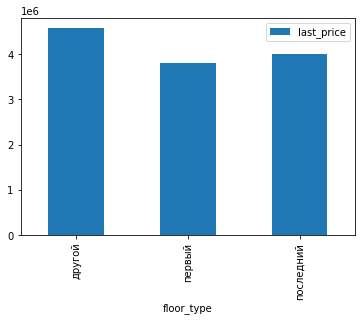

In [48]:
barplot('floor_type')

Цена ниже на квартиры первом этаже, на втором месте по цене - последний этаж.

,last_price
weekday_exposition,
0,4400000.0
1,4455000.0
2,4450000.0
3,4400000.0
4,4350000.0
5,4400000.0
6,4350000.0


,last_price
month_exposition,
1,4400000.0
2,4400000.0
3,4400000.0
4,4550000.0
5,4300000.0
6,4200000.0
7,4350000.0
8,4350000.0
9,4400000.0


,last_price
year_exposition,
2014,5450000.0
2015,4855500.0
2016,4300000.0
2017,4290000.0
2018,4390000.0
2019,4800000.0


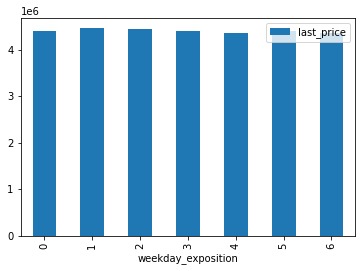

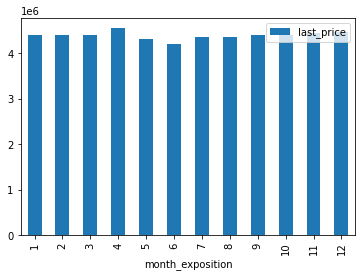

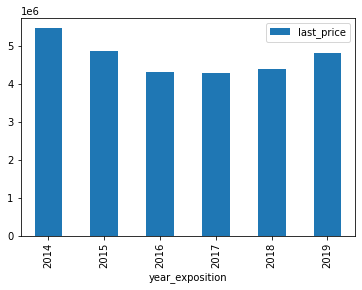

In [49]:
barplot('weekday_exposition')
barplot('month_exposition')
barplot('year_exposition')

Цена не зависит от дня недели, цена на квартиры чуть ниже в июне по сравнению с другими месяцами.
Цены на квартиры были примерно на одном уровне в период с 2016 по 2018 год, в 2019 году наблюдается рост цен. 

,price_per_meter
rooms,
0,105078.202487
1,100000.000000
2,91402.570983
3,85087.719298
4,82000.000000
5,79227.053140
6,81981.981982


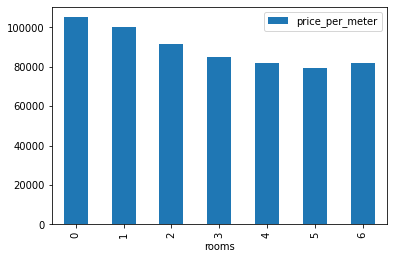

In [50]:
barplot('rooms','price_per_meter')

C увеличением площади (количества комнат в квартире) снижается цена за квадратный метр.

### Топ 10 самых дорогих населенных пунктов

In [51]:
locality_stat = data.pivot_table(index='short_locality_name', values='price_per_meter',  aggfunc=['median', 'count'])
locality_stat.columns = ['price_per_meter', 'count']

top10=locality_stat.sort_values(by=['count'], ascending=False).head(10)

display(top10)

display(top10.sort_values(by=['price_per_meter'], ascending=False).head(1))
display(top10.sort_values(by=['price_per_meter'], ascending=False).tail(1))



,price_per_meter,count
short_locality_name,,
санкт-петербург,102083.333333,13630
мурино,86250.377687,586
кудрово,95435.612635,468
шушары,76747.967480,438
всеволожск,65789.473684,394
пушкин,98454.743209,338
колпино,74722.222222,335
парголово,91780.224134,326
гатчина,67796.610169,303


,price_per_meter,count
short_locality_name,,
санкт-петербург,102083.333333,13630


,price_per_meter,count
short_locality_name,,
выборг,58233.006089,232


В десятке населенных пунктов с наибольшим числом объявлений самая высокая цена квадратного метра в санкт-петербурге, а самая низкая в выборге

###  Цена каждого километра

,last_price
cityCenters_nearest_km,
0.0,7600000.0
1.0,8380000.0
2.0,8200000.0
3.0,7300000.0
4.0,7500000.0
5.0,7499000.0
6.0,6799500.0
7.0,6300000.0
8.0,6282000.0


<AxesSubplot:xlabel='cityCenters_nearest_km'>

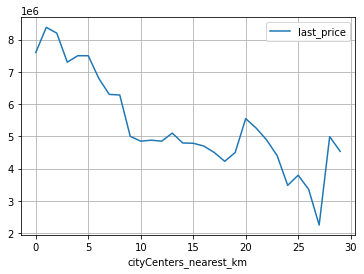

In [52]:
km_stat=data.query("short_locality_name=='санкт-петербург'")
km_stat = km_stat.pivot_table(index='cityCenters_nearest_km', values='last_price',  aggfunc=['median'])
km_stat.columns = ['last_price']

display(km_stat.head(20))
km_stat.plot(y='last_price', kind='line', sharex=False, grid=True,use_index=True)


Наблюдается динамика снижения цены при удалении объкта от центра города 

## Общий вывод

В результате исследования данных были выявлены следующие закомерности:  
    1. В среднем продажа квартиры занимает  91 дней (медиана)  
    2. Чем дальше квартира находится от центра Петербурга, тем ниже ее цена   
    3. Самая высокая цена квадратного метра в Петербурге, а самая низкая в Выборге (если брать топ10 по количеству объявлений)  
    4. В Петербурге больше всего объявлений, вторая по величине средняя цена квадратного метра  
    5. С увеличением площади (жилой, общей) растет цена  
    6. С увеличением числа комнат (а как правило и площади) растет цена  
    7. Цена ниже на квартиры на первом этаже, на втором месте по цене - последний этаж  
    8. В 2019 году наблюдался рост цен на квартиры  
    9.С увеличением площади (количества комнат в квартире) снижается цена за квадратный метр  
    10. Количество объявлений, поданных в мае, ниже по сравнению с другими месяцами   
    11. Число объявлений, поданных в выходные дни, ниже чем в другие дни недели.  
    12. С годами число объявлений в продаже квартир растет(с 2015 по 2019 год).  
    Это может говорить о росте популярности сервиса Яндекс Недвижимость. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения там, где это возможно
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  устранены неявные дубликаты в названиях населённых пунктов
- [X]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [X]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [X]  посчитано и добавлено в таблицу: месяц публикации объявления
- [X]  посчитано и добавлено в таблицу: год публикации объявления
- [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод